#PARTE 1 – HOTELES AIRB&B EN NEW YORK:

In [1]:
# Primeramente, se procede llamando las librerias necesarias para la ejecución del codigo. 
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import folium
from folium import plugins

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Instalamos folium
! pip install folium

In [3]:
# Traemos el csv, con el cual trabajemos los datos. En este caso, busco devolver los primeros y ultimos datos del DataFrame.
data = pd.read_csv('https://raw.githubusercontent.com/thaliabarriosv/TAK_BI_ThaliaBarrios/main/data/AB_NYC_2019.csv')
print('El set de datos tiene {} observaciones, y {} columnas'.format(data.shape[0],data.shape[1]))  
data.head(5).append(data.tail(5))

El set de datos tiene 48895 observaciones, y 16 columnas


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [4]:
# Como podemos notar, se poseen datos NaN en las columnas:'name', 'host_name','last_review','reviews_per_month'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Visualizamos la cantidad exacta de NaN, al ser gran cantidad esta puede alterar los resultados de lo que deseamos analizar.
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

###Podemos apreciar ciertas curiosidades a tener en cuenta:
1. Debemos revisar las Columnas: 'name', 'host_name','last_review', puesto que, tiene información tal vez duplicada y debe ser descartada. 
2. La columna: 'reviews_per_month' es NaN y esta se convierte en cero cuando hay cero 'number_of_reviews'
3. Se debe Reemplazar estos datos NaN con un valor especifico, en este caso 0. 

In [7]:
# Antes de reemplazar los datos NaN, vamos a revisar si existen datos duplicados, de ser así, procederemos a eliminarlos. 
data = data.drop_duplicates(subset='id', keep=False)
data[data.duplicated(subset='id', keep=False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [8]:
# Devuelvo el % de datos duplicados sobre el total del dataframe, que en este caso es 0. 
100 * data[data.duplicated(subset='id', keep=False)].shape[0]/data.shape[0]

0.0

In [9]:
# Ahora, vamos a reemplazar los datos NaN por 0. 
data = data.fillna(0)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [10]:
# Comprobamos que todos los NaN fueron reemplazados.
data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### **Punto 1**
Muestre gráficamente la distribución de la columna “price” de manera independiente. Que hallazgos encuentra?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


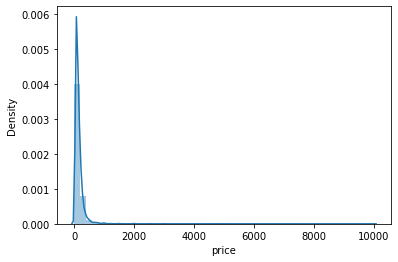

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


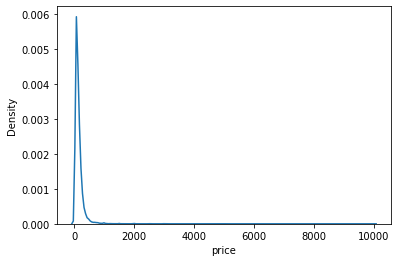

In [12]:
# Grafico la columna 'price', buscando analizar su distribución.
sns.distplot(data['price'])
plt.show()
sns.distplot(data['price'], hist=False) 
plt.show()

In [13]:
# Analizo sus estadísticas basicas. 
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**Respuesta:**
Entre los hallazgos encontrados: 
* Se analiza una distribución muy sesgada a la izquierda.
* También se puede apreciar que la moda es menor a la mediana y la mediana menor que la media.







### **Punto 2**
Muestre gráficamente la relación entre dos variables de su elección, que hallazgos encuentra?

In [14]:
# En este punto, busco entrar la relación entre los Distritos de NY vs El mínimo de noches. 
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
set(data['neighbourhood_group'])

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group')

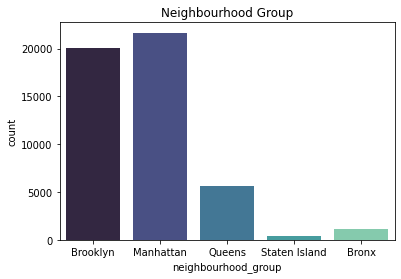

In [17]:
sns.countplot(data['neighbourhood_group'], palette="mako")
fig = plt.gcf()
plt.title('Neighbourhood Group')

In [18]:
data=data[data['minimum_nights']<=365]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


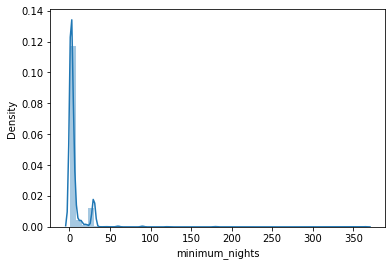

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


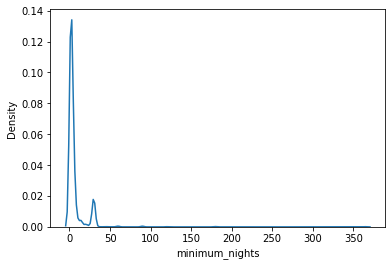

In [31]:
sns.distplot(data['minimum_nights'])
plt.show()
sns.distplot(data['minimum_nights'], hist=False) 
plt.show()

In [20]:
data.groupby('neighbourhood_group')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,4.560953,15.631792,1.0,1.0,2.0,3.0,365.0
Brooklyn,20098.0,5.895711,14.532302,1.0,2.0,3.0,5.0,365.0
Manhattan,21655.0,8.345371,18.823771,1.0,1.0,3.0,6.0,365.0
Queens,5664.0,5.010240,11.952636,1.0,1.0,2.0,3.0,365.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


**Respuesta:**
* El distrito con mas visitas es Manhattan. No es sorpresa teniendo en cuenta que es el mayor centro financiero del mundo y posee amplia zona turística, en la cual se opina, va mas guiada a ejecutivos y tipos de viajeros que pueden costerar hospedaje. 
* Seguido de Brooklyn, de gran interés principalmente turístico, así como también lleno de bares y tiendas de ropa. 
* Queens, el distrito donde esta el aeropuerto JFK además sus amplios museos y parques obteniendo un gran plus para algunos viajeros. 
* El Bronx, siendo una zona que aún genera temor al visitante, no existe una respuesta puesto que cada turista tiene su propia percepción del asunto, pero en terminos de marketing el fenómeno "WOM", influye en gran cantidad.
* Staten Island, aún siendo el más alejado posee una cantidad media de noches a comparación del resto de distritos, tal vez, al ser menos atrativo genera más tranquilidad a cierto porcentaje de visitantes. 


### Punto 3
Muestre gráficamente la relación entre tres variables de su elección, diferentes a las anteriores, que hallazgos encuentra?

In [27]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [21]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Room Type')

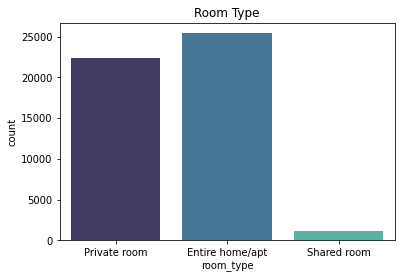

In [22]:
sns.countplot(data['room_type'], palette="mako")
fig = plt.gcf()
plt.title('Room Type')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


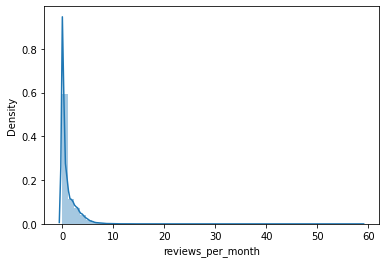

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


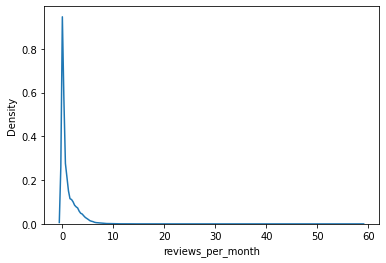

In [32]:
sns.distplot(data['reviews_per_month'])
plt.show()
sns.distplot(data['reviews_per_month'], hist=False) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


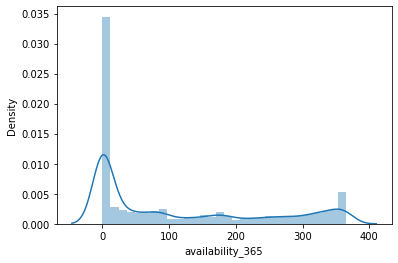

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


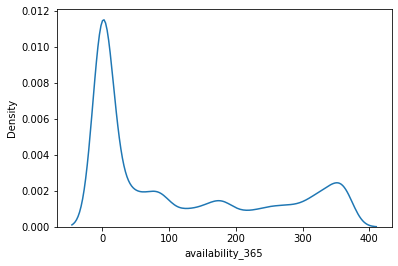

In [30]:
sns.distplot(data['availability_365'])
plt.show()
sns.distplot(data['availability_365'], hist=False) 
plt.show()

In [38]:
data=data[data['minimum_nights']<=365]

In [37]:
data=data[data['reviews_per_month']<=30]

In [41]:
data.groupby('room_type')['availability_365'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,25400.0,111.855748,129.759994,0.0,0.0,42.0,228.0,365.0
Private room,22321.0,111.167869,132.076324,0.0,0.0,45.0,214.0,365.0
Shared room,1159.0,161.825712,151.294783,0.0,0.0,90.0,341.0,365.0


**Respuesta:**

Para este punto tome 3 variables: Tipo de habitación, disponibilidad los 365 días del año y review por mes.
* Notamos que la variables que mas toma revelevancia es 'Entire home/apt', ya que, normalmente el viajero siempre desea privacidad, su cantidad de disponilidad siempre será limitada, que el el minimo de noches comienza a ser desde 8 en su distrito más concurrido y donde los hospedados tiene mayor capacidad de pago sin limitaciones. 
* Seguido, analizamos 'Private room', habitación punto medio para un viajero que desee su espacio y un presupuesto calculado, nos muestra que tiene un disponibilidad parecida a 'Entire home/apt', esto nos indica que aunque sean menos el conteo, muchas personas dedicen tomar ese especio por más tiempo y cualquier distrito siendo la mas conmún.
* Por ultimo, 'Shared room', la solución más economica brindada pero la menos tomada, por lo que vemos es poco habilitada en la plataforma. 

In [45]:
data.groupby('neighbourhood_group')['room_type'].describe()

,count,unique,top,freq
neighbourhood_group,,,,
Bronx,1091,3,Private room,652
Brooklyn,20098,3,Private room,10128
Manhattan,21654,3,Entire home/apt,13194
Queens,5664,3,Private room,3372
Staten Island,373,3,Private room,188


### **Punto 4**
Muestre en un mapa, usando los valores de latitud y longitud, la ubicación de los alojamientos y su valor por noche (Price)

In [23]:
# Para la realización de este punto, primeramente ubicar y visualizar a NYC en el mapa. 
import folium
a = 40.6643 #Latitud
b = -73.9385 #Longitud
nyc_map = folium.Map(location= [data["latitude"].mean(), data["longitude"].mean()]) 
nyc_map

In [24]:
# Agregamos puntos
nyc_map = folium.Map(location=(40.6643, -73.9385))
marcador1 = folium.Marker(location=(40.64749, -73.97237))

marcador1.add_to(nyc_map)

nyc_map

In [25]:
nyc_map = folium.Map(location=[40.64749, -73.97237], zoom_start =15)
data_= data[['latitude','longitude', 'price']].values
data_ =data_.tolist()  
location = plugins.FastMarkerCluster(data_)
location.add_to(nyc_map)
nyc_map

#PARTE 2 – TEORIA:

**1. 1.	Qué conclusiones puede sacar de los datos del ejercicio anterior? (Mínimo 3)**
* El turismo, tiene una importancia y participación considerable en la economía de todo país, ya que al mejorarse este factor se contribuye al crecimiento y desarrollo; genera la construcción y adecuación de los espacios físicos, así como la apertura de más medios de transporte y áreas de esparcimientos capaces de volver más atractiva la oferta y atraer a una mayor número de demanda, lo que hace catalogar a lugar analizado mucha capacidad de visita. 

* El corazón de NYC, será Manhattan por excelencia un lugar imponente, lleno de matices no solo financiera sino artística, será uno de los preferidos al momento de habitar para los antiguos y futuros visitantes. 

* La perspectiva del visitante y turista siempre es muy compleja, este se maneja de varios tipos de variables, como mencionaba anteriormente uno de los principales es el fenómeno WOM (Word-of-Mouth), mucho es guiado bajo recomendaciones no solo de la pagina porque muchos lugares no tenían grandes cantidades de reseñas actualizadas y su máximo en reseñas fue de 629, sino, de un comentario con antelación de amigo/familiar o blog del mismo internet, guiado según su tipo de viaje (ocio o negocio), todo esto se propaga de manera exponencial e influencia prácticamente todas las decisiones de compra y pago del visitante. 

**1. 2.	Si usted fuera a alquilar un alojamiento en NYC, en base a estos datos, qué buscaría?**
* Factor económico —price—, 
* Factor movilidad en distrito —neighbourhood_group—
* Factor estabilidad y privacidad —room_type—.

Desde mi punto, me considero un tipo de viajero explorador/amante del arte, dado a esto, controlo mi presupuesto para realizar diferentes actividades en los días a disfrutar, así como también me gusta tener una comodidad en la medida y basado a los datos analizados, si hoy emprendiera un viaje por ocio a NYC, tomaría una habitación privada en el distrito de Brooklyn a un precio no mayor de 50 usd. 

**1. 3.	Si usted fuera a rentar su vivienda como alojamiento en NYC en base a esto datos, qué publicaría?**
* Factor económico —price—, 
* Factor movilidad en distrito —neighbourhood_group—
* Factor estabilidad y privacidad —room_type—.

Los mismos datos que como usuaria buscaría al momento de rentar, todos podemos ser viajeros pero no todos cuentan con la misma cantidad de presupuesto. Lo ideal es que cada posible turista encuentre rentar un lugar a la medida y con esto alimentar la económica destino. 

**1. 4.	Imagine qué se tiene también este archivo para los años 2010 a 2018.**

* **Podría incluirse el tiempo como variable en la predicción? (Serie de Tiempo)**

Sí, ver cómo evoluciona una curva a lo largo del tiempo nos muestra el cambio en turismo y su evolución.

* **Sí es así, qué información adicional reflejaría? De no ser así, porque no? Explique.**

Las facilidades de los turistas incrementaron a comparación del 2010, en ese tiempo no todo tipo de persona podía realizar un viaje y dichas facilidades eran pocas. A medida del tiempo, nos mostraría que la nueva generación y formas de turismo, sumado a los avances tecnológicos, viajar sigue siendo un costo pero que muchas más personas pueden tomar por ocio o negocio. 


#PARTE 3 – TEORÍA – ANALÍTICA AVANZADA (OPCIONAL):

1. **Podría realizarse un modelo de Machine Learning para predecir la variable “price_range” en base a los atributos del hospedaje?**

Si, a través de un aprendizaje supervizado. 

* **Sería un modelo de aprendizaje Supervisado o No Supervisado? Porqué?**

Supervisado, porque esto nos ayudaría a predecir valores numéricos a partir de caracteriticas y se debe incluir el precio en el set de datos. Y no supervisado, sí queremos usar los datos por ejemplo para realizar Clustering. 

* **Sería un modelo de Regresión, Clasificación o Segmentación? Porqué?**

Regresión o Clustering, si es basado a datos históricos y la finalidad del mismo.

* **Qué métrica usaría para evaluar el Modelo? Porqué?** --



2. **Para el problema que acaba de resolver (predecir el rango de precio de hospedaje):**
* **Pudiera ser resuelto con una Red Neuronal?** ---
* **Explique Ventajas y Desventajas.** ---
* **Prefiere las redes neuronales a un modelo de Machine Learning tradicional? (Regresión, Clasificación, Segmentación) Porqué?** ---

3. **Qué significa que un modelo esté sobreajustado? Cómo se puede solucionar?**

Un modelo donde los datos no estén tan generalizados como se necesita y que no brinda la suficiente fiabilidad, este se puede solucionar subdividiendo el conjunto de datos en dos (80% entrenamiento y 20% a test). 

4. **Explique los conceptos: Red Neuronal, RN Convolucional, descenso de gradiente** ---

Red neuronal, combinar ciertos parametros para predecir un cierto resultado. 

5. **Qué es NLP y qué métodos conoce?** 

Conocido como Procesamiento de Lenguaje Natural, siendo el estudio de lenguaje humano e informático. Un método conocido son las Traducciones. 

6. **Qué pasos y qué tecnología usaría para que su modelo pueda ser usado, en tiempo real, por personas de todo el mundo?**

Subirlo a un un repositorio nube como ejemplo Tableau, PowerBi, etc. 






¡ Muchas gracias ! 